# RATE visualization scatterplots

In [1]:
import json
import statistics
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
data_matrix = pd.read_csv('../tr-regression/full_matrix_for_prediction.csv')

In [3]:
def load_json(path):
    with open('../data/moby/jsons/' + path) as f:
        return json.load(f)

In [4]:
response_to_item = load_json('child_response_to_item.json')
item_to_form = load_json('item_to_form.json')
form_to_grade = load_json('form_to_grade.json')

In [5]:
session_to_annote_category_to_scores = load_json('session_to_annote_category_to_scores.json')
response_to_annote_category_to_score = load_json('response_to_annote_category_to_scores.json')

In [6]:
response_to_words = load_json('child_response_to_words.json')
session_to_responses = load_json('child_session_to_responses.json')

In [7]:
response_to_words['288786']

def get_average_token_length(wordlist):
    stripped_wordlist = wordlist[1:-1]
    return statistics.median(x[2] for x in stripped_wordlist)

def get_average_non_pause_token_length(wordlist):
    modified_wordlist = [x for x in wordlist[1:-1] if x[0][0] != '<']
    return statistics.median(x[2] for x in modified_wordlist)

def get_average_pause_token_length(wordlist):
    modified_wordlist = [x for x in wordlist[1:-1] if x[0][0] == '<']
    return statistics.median(x[2] for x in modified_wordlist)

def get_average_pause_token_length_with_threshold(wordlist, threshold=15):
    modified_wordlist = [x for x in wordlist[1:-1] if x[0][0] == '<']
    modified_wordlist = [x for x in modified_wordlist if x[2] >= threshold]
    return statistics.median(x[2] for x in modified_wordlist)

In [8]:
def get_session_to_contains_3(session_to_annotate_category_to_scores):
    session_to_contains_3 = {}
    for session, annotate_category_to_scores in session_to_annotate_category_to_scores.items():
        session_to_contains_3[session] = False
        if '11' in annotate_category_to_scores:
            if 3.0 in annotate_category_to_scores['11']:
                session_to_contains_3[session] = True
    return session_to_contains_3

def get_session_to_contains_1(session_to_annotate_category_to_scores):
    session_to_contains_3 = {}
    for session, annotate_category_to_scores in session_to_annotate_category_to_scores.items():
        session_to_contains_3[session] = False
        if '11' in annotate_category_to_scores:
            if 1.0 in annotate_category_to_scores['11']:
                session_to_contains_3[session] = True
    return session_to_contains_3

In [9]:
# session_to_contains_3 = get_session_to_contains_3(session_to_annote_category_to_scores)
# response_to_contains_3 = get_session_to_contains_3(response_to_annote_category_to_score)

In [10]:
def plot_scatter_response_level(feature_fn_1, feature_fn_2, items, label='', title=''):
    x_list_true = []
    y_list_true = []
    x_list_false = []
    y_list_false = []
    for response, label_val in items.items():
        try:
            words = response_to_words[str(response)]
            x_val = feature_fn_1(words)
            y_val = feature_fn_2(words)
        except:
            pass
        if label_val:
            x_list_true.append(x_val)
            y_list_true.append(y_val)
        else:
            x_list_false.append(x_val)
            y_list_false.append(y_val)
    plt.figure(figsize=(4,4), dpi=100)
    plt.title(title)
    plt.xlim(0, 80)
    plt.ylim(0, 80)
    plt.xlabel('average non pause token length')
    plt.ylabel('average pause token length')
    plt.scatter(x_list_true, y_list_true, marker='x', alpha=.2, c='red', label=label + '=True')
    plt.scatter(x_list_false, y_list_false, marker='.', alpha=.1, c='blue', label=label + '=False')
    plt.legend()
    plt.show()
    print('true:', len(x_list_true))
    print('false:', len(x_list_false))

In [11]:
response_to_contains_3 = get_session_to_contains_3(response_to_annote_category_to_score)
response_to_contains_1 = get_session_to_contains_1(response_to_annote_category_to_score)
response_to_not_all_2s = {
    response: (contains_1 or response_to_contains_3[response])
    for response, contains_1 in response_to_contains_1.items()
}

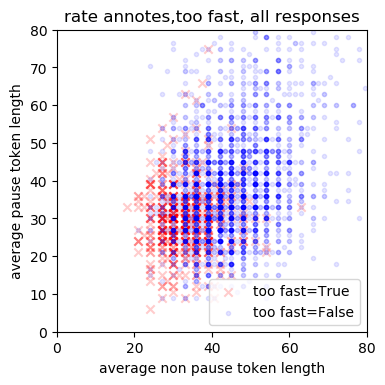

true: 476
false: 3145


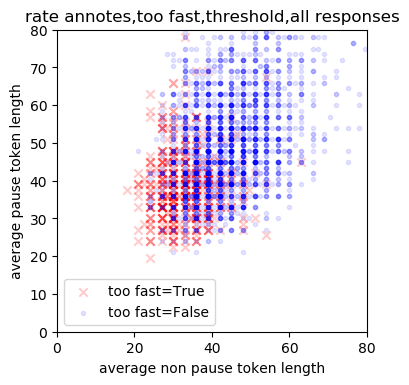

true: 476
false: 3145


In [12]:
plot_scatter_response_level(
    get_average_non_pause_token_length,
    get_average_pause_token_length,
    get_session_to_contains_3(response_to_annote_category_to_score),
    'too fast',
    'rate annotes,too fast, all responses')
plot_scatter_response_level(
    get_average_non_pause_token_length,
    get_average_pause_token_length_with_threshold,
    get_session_to_contains_3(response_to_annote_category_to_score),
    'too fast',
    'rate annotes,too fast,threshold,all responses')

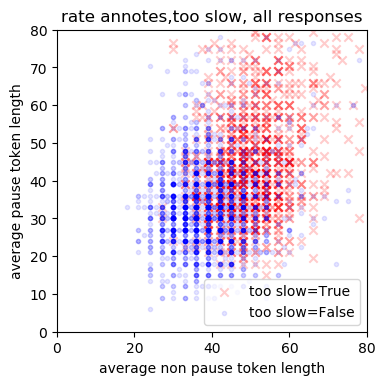

true: 1136
false: 2485


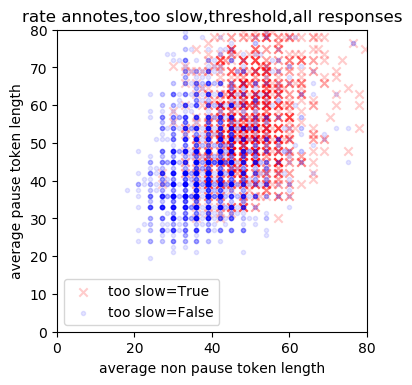

true: 1136
false: 2485


In [13]:
plot_scatter_response_level(
    get_average_non_pause_token_length,
    get_average_pause_token_length,
    get_session_to_contains_1(response_to_annote_category_to_score),
    'too slow',
    'rate annotes,too slow, all responses')
plot_scatter_response_level(
    get_average_non_pause_token_length,
    get_average_pause_token_length_with_threshold,
    get_session_to_contains_1(response_to_annote_category_to_score),
    'too slow',
    'rate annotes,too slow,threshold,all responses')

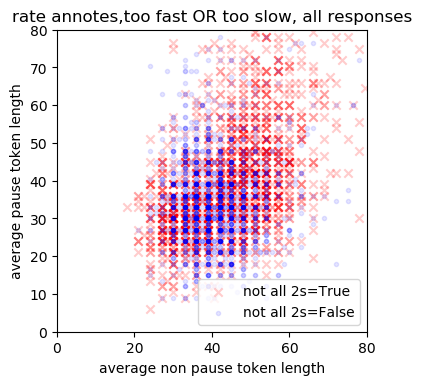

true: 1598
false: 2023


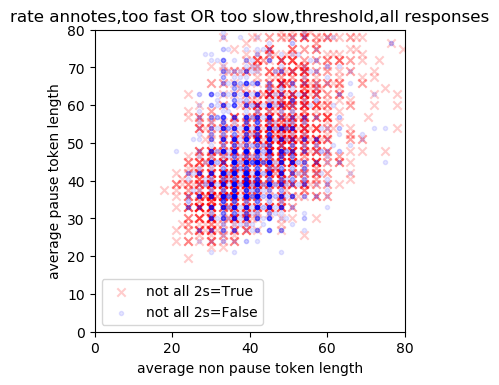

true: 1598
false: 2023


In [14]:
plot_scatter_response_level(
    get_average_non_pause_token_length,
    get_average_pause_token_length,
    response_to_not_all_2s,
    'not all 2s',
    'rate annotes,too fast OR too slow, all responses')
plot_scatter_response_level(
    get_average_non_pause_token_length,
    get_average_pause_token_length_with_threshold,
    response_to_not_all_2s,
    'not all 2s',
    'rate annotes,too fast OR too slow,threshold,all responses')

By __grade level__

In [15]:
grade_to_response_to_annote_category_to_score = defaultdict(dict)
for response, annotate_category_to_scores in response_to_annote_category_to_score.items():
    if response in response_to_item:
        item = response_to_item[response]
        form = item_to_form[str(item)]
        grade = form_to_grade[form]
        grade_to_response_to_annote_category_to_score[grade][response] = annotate_category_to_scores
        
form_to_response_to_annote_category_to_score = defaultdict(dict)
for response, annotate_category_to_scores in response_to_annote_category_to_score.items():
    if response in response_to_item:
        item = response_to_item[response]
        form = item_to_form[str(item)]
        form_to_response_to_annote_category_to_score[form][response] = annotate_category_to_scores

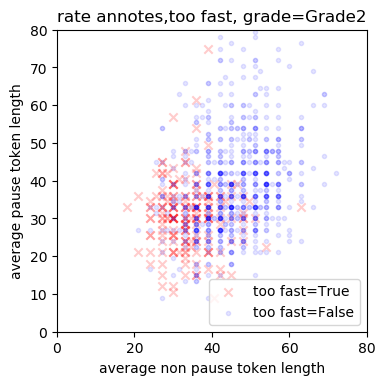

true: 175
false: 746


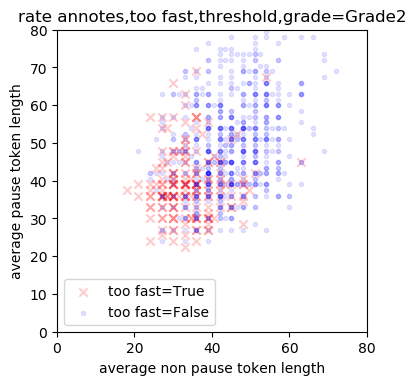

true: 175
false: 746


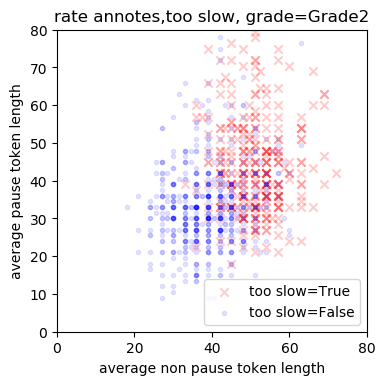

true: 314
false: 607


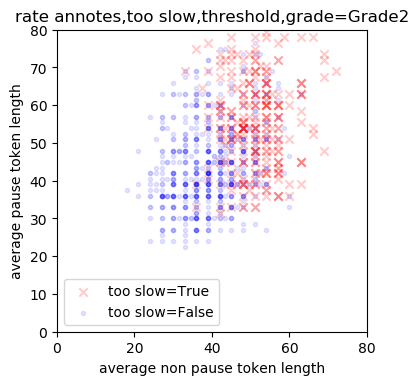

true: 314
false: 607


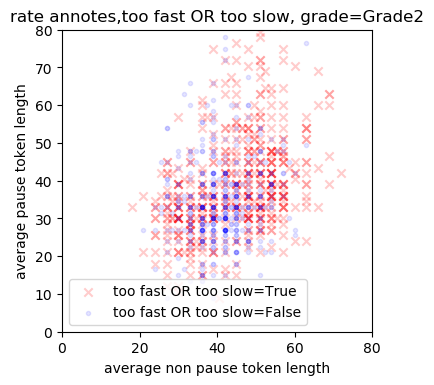

true: 480
false: 441


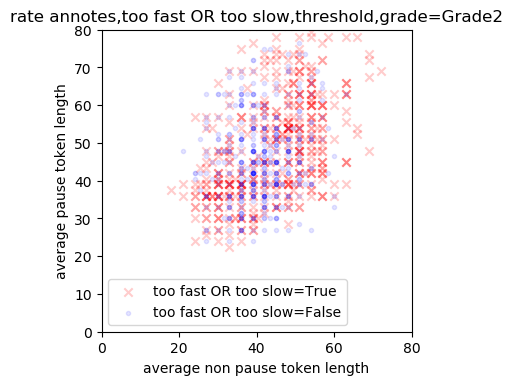

true: 480
false: 441


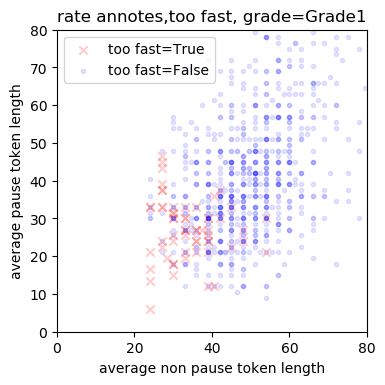

true: 60
false: 840


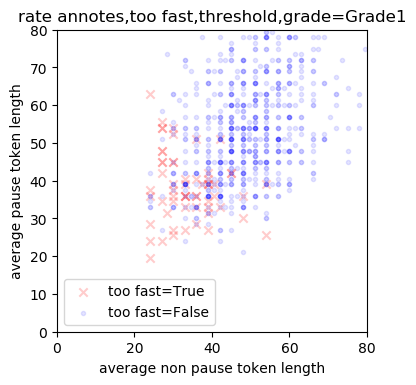

true: 60
false: 840


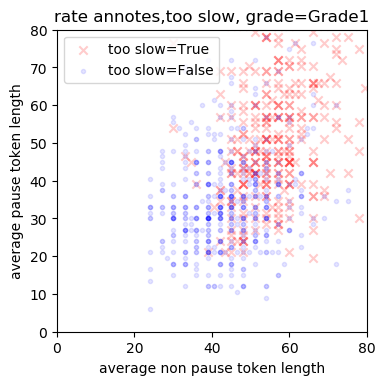

true: 378
false: 522


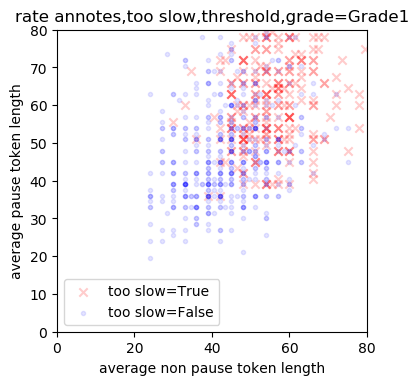

true: 378
false: 522


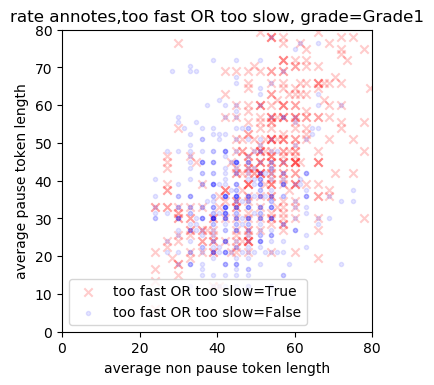

true: 438
false: 462


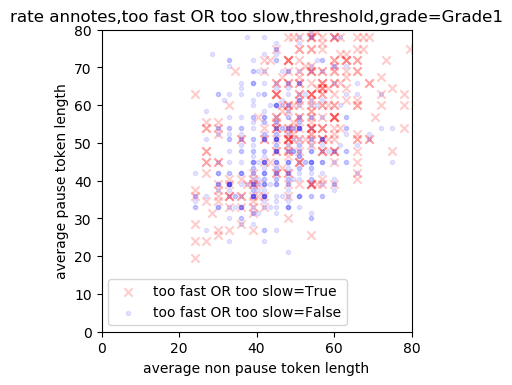

true: 438
false: 462


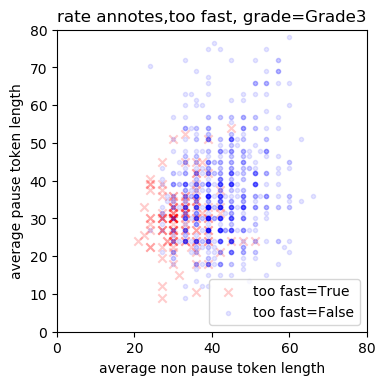

true: 118
false: 783


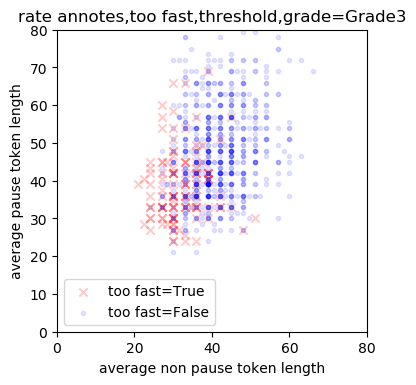

true: 118
false: 783


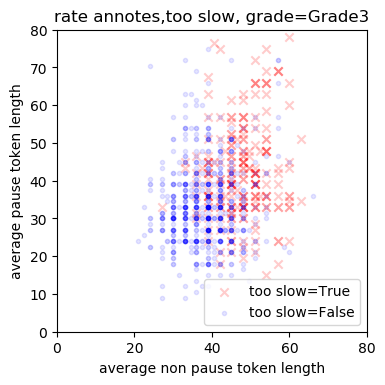

true: 212
false: 689


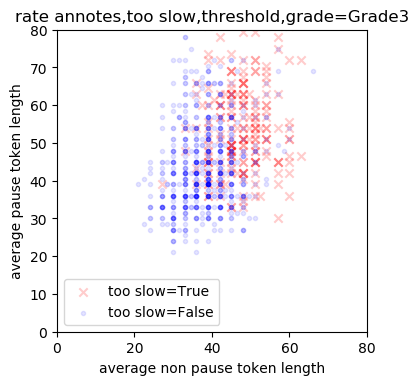

true: 212
false: 689


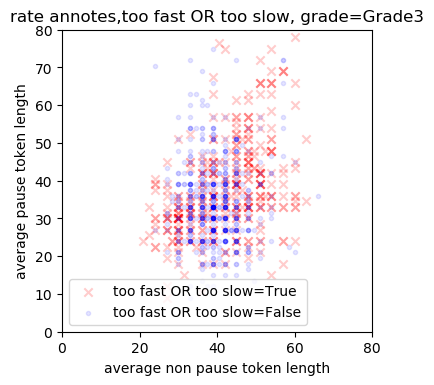

true: 328
false: 573


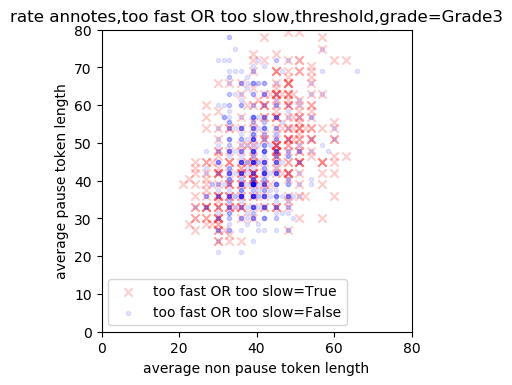

true: 328
false: 573


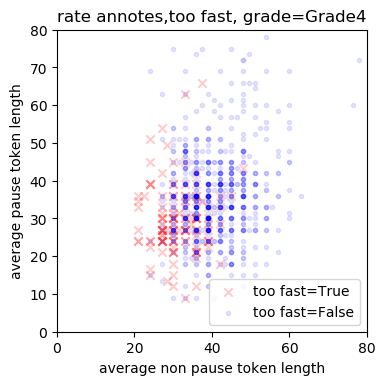

true: 123
false: 761


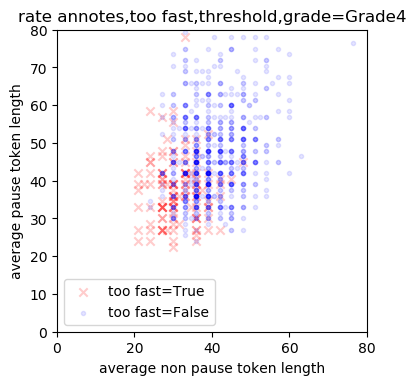

true: 123
false: 761


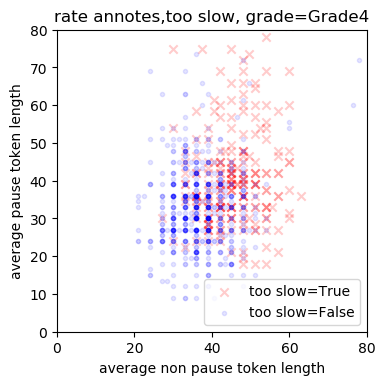

true: 220
false: 664


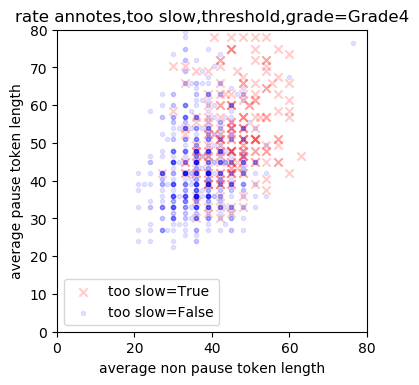

true: 220
false: 664


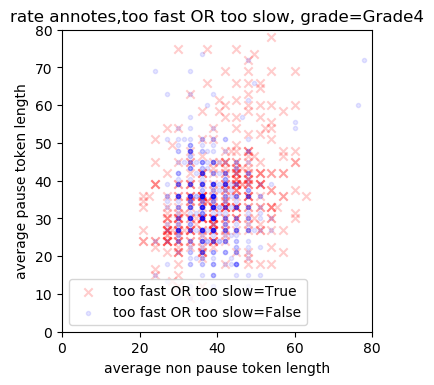

true: 340
false: 544


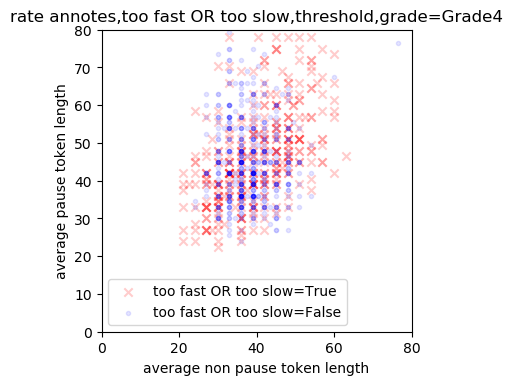

true: 340
false: 544


In [16]:
for grade, response_to_annote_category_to_score in grade_to_response_to_annote_category_to_score.items():
    contains_3 = get_session_to_contains_3(response_to_annote_category_to_score)
    contains_1 = get_session_to_contains_1(response_to_annote_category_to_score)

    not_all_2s = {
        response: (contains_1 or contains_3[response])
        for response, contains_1 in contains_1.items()
    }
    
    
    for d, title in zip([contains_3, contains_1, not_all_2s], ['too fast', 'too slow', 'too fast OR too slow']):
        plot_scatter_response_level(
        get_average_non_pause_token_length,
        get_average_pause_token_length,
        d,
        title,
        'rate annotes,' + title + ', grade=' + grade)
        plot_scatter_response_level(
        get_average_non_pause_token_length,
        get_average_pause_token_length_with_threshold,
        d,
        title,
        'rate annotes,' + title + ',threshold,grade=' + grade)

In [17]:
# for form, response_to_annote_category_to_score in form_to_response_to_annote_category_to_score.items():
#     plot_scatter_response_level(
#     get_average_non_pause_token_length,
#     get_average_pause_token_length,
#     get_session_to_contains_3(response_to_annote_category_to_score),
#     'contains 3',
#     'rate annotates,contains 3, form=' + form)